<h2>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</h2>

Think of 6 Degrees of Kevin Bacon -- only this time, it's a social network analysis (SNA) of the actors and directors of Bollywood films from for the 50 years from 1970-2018 (the modern era). This project is a reincarnation and expansion of an earlier project that was part of a tutorial and workshop on social network analysis (SNA) that I conducted at HICSS-47 (2014). That tutorial looked at social networks in Bollywood movies for all the Bollywood films from 2008-2013. The slides from that earlier tutorial are provided here for reference. This current rendition expands the sample from 6 years of films to the 49 years of films from 1970 to 2018.

The genesis of my initial work, as well as this expansion, is found not only in the simple games, applications, and research revolving around the "Six Degrees of Kevin Bacon" (based on Hollywood films), but also the larger body of SNA including the concepts of degrees of separation, clustering, and small world networks:

<ul>
<li><a href="https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon">Six Degrees of Kevin Bacon</a></li>
<li><a href="https://oracleofbacon.org/center.php">The Center of the Hollywood Universe</a></li>
<li><a href="https://en.wikipedia.org/wiki/Small-world_network">Small-world Networks</a></li>
</ul>

The project involves three intertwined phases. The first phase focuses on the creation of the data set on which the SNA analysis is based along with a brief statistical overview of the data set. The second phase is devoted to a SNA of this dataset -- looking primarily at who works with whom and who the key players are from a SNA perspective. Finally, the third phase combines this data with another data set based on 'Hindi Film Families' in order to look at the participation and influence of these families in Bollywood films. The analysis in all 3 phases is housed in 3 separate Jupyter iPython notebooks.

<ol>
    <li>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</li>
    <li>SNA of Bollywood Films - Phase 2: Participation and Influence of Directors and Actors</li>
    <li>SNA of Bollywood Films - Phase 3: The Role of Film Families in Bollywood</li>
</ol>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Introduction](#intro)<br>
2. [Constructing the Data Set](#dataset)<br>
3. [Transforming the data set into a Dataframe](#dataframe)<br>
4. [Getting the Lay of the Land: Structure and Contents of the Dataframe](#lay_land)<br>


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h3>Constructing the Data Set</h3>

The foundation for the data set comes from a wikipedia page indexing the <a href="https://en.wikipedia.org/wiki/Lists_of_Bollywood_films">Lists of Bollywood Films</a> for the years from 1940 to 2018. For the moment, I'm leaving the earlier years from 1940-1969 for future analysis, primarily because it is extremely labor intensive working with the wide variety of data formats, missing data, and errors found in even smaller subsets of the films in these lists. \[Note: the IMDB data sets provide info about Bollywood films and actors, but it is not as comprehensive as the lists provided in Wikipedia.]

Each entry in the <i>Lists</i> designates a link to a wikipedia page devoted to the Bollywood films for a single year. The structure of all the links is simple (e.g. the link for 2018 is wikipedia.org/wiki/List_of_Bollywood_films_of_2018). This makes it straightforward to write a program to download each of the 50 pages in this sample, which is what I did -- see the Python (3.+) program in this repository labeled <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/retrieveListofBollywoodFilmsbyYear.py'><i>retrieveListofBollywoodFilmsbyYear.py</i></a>. Once the pages were downloaded, they were each stored in a local (HTML) file for further analysis.

Each of the downloaded webpages contains an HTML table of information about each of the films produced with in a given year. While the structure and content of the pages and tables varied from one decade, and often one year, to the next, all of the tables provided information about the following for each film:

<ul>
  <li>year of release</li>
  <li>title</li>
  <li>HTML link to a wikipedia page devoted to that title</li>
  <li>director(s) (one or more)</li>
  <li>cast (i.e. list of actors names in the film)</li>
  <li>genre(s) (one or more tags denoting the type of movie, e.g. Romance, Drama, Comedy, etc.)</li>
</ul>

Again, a program -- <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollySetUp-HTMLLists.py'><i>bollySetUp-HTMLLists.py</i></a> -- was used to extract the rows from each of the 50 tables and to create a single, consolidated table for all of the films from all of the years. A quick look at this Python 3 program will reveal that it employs a small set of functions based on Beautiful Soup package along with a number of simple text and regular expression "re" function calls. In the program, the title and it's associated page link are defined as strings, while the director, cast and genre variables are all Python lists because they contain 0 or more entries.  At the moment, the results are stored row-by-row in an Excel file whose name is <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollywoodData.xlsx'><i>bollywoodData.xlsx</i></a>).

<h3>Transforming the data set into a Dataframe</h3>

Given that the data is in an .xlsx file, one of the first steps I've taken in producing a statistical overview of the data is to read the file with a pandas 'read_excel' method or function which transforms it into a pandas 'dataframe'.

Note: While I could have read the file and transformed it into a variety of formats, I selected pandas primarily because of it's analytical capabilities (for a summary of these, see <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks"> <i>Pandas Notes</i></a> - a Python notebook provided in one of my other repositories).

In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt

# read bollywoodData.xlsx transforming it to a pandas dataframe
bollywoodPath = "c:/Research/Bollywood/"
bollywoodXLFile = bollywoodPath + "bollywoodData.xlsx"
bollywoodDF = pd.read_excel(bollywoodXLFile, sheet_name="bollywoodData")
print('Type of bollywoodDF:',type(bollywoodDF))


Type of bollywoodDF: <class 'pandas.core.frame.DataFrame'>


  Given the 'bollywoodDF' dataframe, we should get a sense of its structure (size, shape, column names and types, and its row index) and the contents of it's cells. 

In [23]:
# Dimensional Structure

print("1. Number of dimensions: bollywoodDF.ndim", bollywoodDF.ndim)
print()
print("2. Number of elements in each dimension: bollywoodDF.shape", bollywoodDF.shape)
print("")
print("3. Range of row numbers: bollywoodDF.index:")
print("")
print(bollywoodDF.index)
print("")
print("4. Names of columns: bollywoodDF.columns:")
print("")
print(bollywoodDF.columns)
print("")
print("5. Size -- number of elements (rows x columns): bollywoodDF.size", bollywoodDF.size)
print("")
print("6. Info about row index and column names and types and : bollywoodDF.info()")
print("")
print(bollywoodDF.info())

1. Number of dimensions: bollywoodDF.ndim 2

2. Number of elements in each dimension: bollywoodDF.shape (4908, 9)

3. Range of row numbers: bollywoodDF.index:

RangeIndex(start=0, stop=4908, step=1)

4. Names of columns: bollywoodDF.columns:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count'],
      dtype='object')

5. Size -- number of elements (rows x columns): bollywoodDF.size 44172

6. Info about row index and column names and types and : bollywoodDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 9 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movieLink        4154 non-null object
movieDirector    4083 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null object
count            4908 non-null int64
dtypes: int64(

Based on this information, it's easy to see that it's a two dimensional dataframe (rows x columns). There are 4908 rows and 9 columns in the dataframe.  The row index indicates that they are numbered from 0 to 4907. The 9 column names were taken from the header row in the Excel table and include:

    _id, movieID, movieTitle, movieYear, movieLink, 
    movieDirector, movieCast, movieGenre, and count
    
The combination of 4908 rows and 9 columns results in 44172 cells.

In addition to the column names, the 'dataframe.info()' method or function also provides details about the column type. As it notes, there were 3 columns containing integers and 6 columns containing 'objects' which in this case is 'strings'. Finally, the 'info' method provides the number of non-null cells by column. So, for instance, while there are 4908 cells in each column, in the 'movieLink' column only 4154 of them have non-null values. The rest of the 754 cells is missing.

Although the 'info' method encompasses all the information provided by the 'dataframe.columns' and 'dataframe.index' methods, it isn't easy to extract individual pieces of info from its results. For example, if you want to create a list of column names for other programming purposes (which often happens), you can't pull it easily from 'info' but you can get it from the dataframe.columns method.

While the column names and types provide some hints about the contents of the cells in a particular column, the only way to really understand the contents is to look a few cells for each of the columns.  A simple way to do this is with the head and tail methods or functions.  The 'head' method displays the rows at the top, while the tail displays the rows at the bottom.  By default the display 5 rows, but you designate more rows or less.

In [35]:
print("First 5 rows of the dataframe: bollyWoodDF.head()")
bollywoodDF.head()

First 5 rows of the dataframe: bollyWoodDF.head()


,_id,movieID,movieTitle,movieYear,movieLink,movieDirector,movieCast,movieGenre,count
0,0,1970-0,Aag Aur Daag,1970,/wiki/Aag_Aur_Daag,A. Salaam,Joy Mukherjee|Madan Puri,Action,1
1,1,1970-1,Aan Milo Sajna,1970,/wiki/Aan_Milo_Sajna,Mukul Dutt,Asha Parekh|Rajesh Khanna|Vinod Khanna,Drama,1
2,2,1970-2,Aansoo Aur Muskan,1970,/wiki/Aansoo_Aur_Muskan,P. Madhavan,Bindu|Padmini,Drama,1
3,3,1970-3,Abhinetri,1970,/wiki/Abhinetri,Subodh Mukherjee,Shashi Kapoor|Hema Malini|Deb Mukherjee,Drama,1
4,4,1970-4,Bachpan,1970,/wiki/Bachpan,Kotayya Pratyagatma,Sanjeev Kumar|Tanuja,Drama,1


In [33]:
print("Last 5 rows of the dataframe: bollywoodDF.tail()")
bollywoodDF.tail()

Last 5 rows of the dataframe: bollywoodDF.tail()


,_id,movieID,movieTitle,movieYear,movieLink,movieDirector,movieCast,movieGenre,count
4903,4903,2018-116,Mangal Ho,2018,/wiki/Mangal_Ho,Pritish Chakraborty,Pritish Chakraborty|Aanushka Ramesh|Sanjay Mis...,SciFi|Comedy,1
4904,4904,2018-117,The Accidental Prime Minister (film),2018,/wiki/The_Accidental_Prime_Minister_(film),Vijay Ratnakar Gutte,Anupam Kher|Akshaye Khanna,Biopic,1
4905,4905,2018-118,Amavas,2018,/wiki/Amavas,Vijay Ratnakar Gutte,Anupam Kher|Akshaye Khanna,Biopic,1
4906,4906,2018-119,Zero (2018 film),2018,/wiki/Zero_(2018_film),Aanand L. Rai,Shah Rukh Khan|Katrina Kaif|Anushka Sharma|Tig...,Comedy|Drama,1
4907,4907,2018-120,Simmba,2018,/wiki/Simmba,Rohit Shetty,Ranveer Singh|Sara Ali Khan|Sonu Sood,Action|Comedy,1


With one exception (missing values), the 'heads's and 'tail's methods provide a pretty good understanding of the contents in the various columns and cells:

<ol>
    <li>_id -- this is a numerical 'id' used to indicate the ordered position of the row (i.e. movie) in the dataframe. Because it is unique, it can be used by other programs as a 'hashed' index. My choice of this particular  label ('\_id') was purposeful because this is the label that the 'document-database' MongoDB searches for when it tries to construct and index for a 'collection' of documents (see the notebook <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks/blob/master/SemiStructuredData_PythonDicts_JSON_MongoDB_PyMongo.ipynb">Working with Semi-Structured Data: Python Dictionaries, JSON, MongoDB and PyMongo</a> in another of my repositories).</li>
    <li>movieID -- string indicating the position of the movie within a given year. Number starts at 0. For example, as shown the first movie (chronologically) in 1970 is 1970-0, the second 1970-1, etc.</li>
    <li>movieTitle -- title of the movie</li>
    <li>movieYear -- number representing the year released</li>
    <li>movieLink -- sting representing a link (usually) to wikipedia web page (complete link is prefaced by http://wikipedia/...)</li>
    <li>movieDirector -- string containing list of director names separated by a pipe '|' </li>
    <li>movieCast -- string containing list of cast member names separated by a pipe '|'</li>
    <li>movieGenre -- string containing list of genre names separated by a pipe '|'. As Wikipedia notes, "A film genre is a motion-picture category based  on similarities either in the narrative elements or in the emotional response to the film"</li>
    <li>count -- used programmatically as a quick way to compute total counts</li>
</ol>

The pipe symbol '|' is often used to create a string to represent a list of entities. In this way, variables or fields whose values are lists of entities can be entered and stored in a table or spreadsheet (just like they were in the bollywoodData.xlsx spreadsheet). Of course, if they are stored table cell in this manner, then they'll have to be split programmatically before they can be used in virtually any kind of analysis. This is why, other formats and data structures are (e.g. Python dictionaries) preferable. However, for the time being I'm going to ignore other options and will contine to use the current dataframe.

<h3>Statistical Overview</h3>

In it's current form, there's not much of interest to statistically summarize in the Bollywood dataframe ('bollywoodDF) except maybe the number of movies for various year. So, let start by first computing some counts of the number of directors, cast members, and genres for each.  In order to do this we're going to have to figure out how to work with the 'piped' strings. If all we want to do is determine the number contained in the piped string, then we could use something like the 'findall' method found in the regular expressions ('re') library. For example,

In [95]:
import re

for i in range(5):
    castStr = bollywoodDF.loc[i,'movieCast']
    castCnt = len(re.findall(r"\|",castStr)) + 1
    print("cast members:", castStr, " -- number in cast:", castCnt)

cast members: Joy Mukherjee|Madan Puri  -- number in cast: 2
cast members: Asha Parekh|Rajesh Khanna|Vinod Khanna  -- number in cast: 3
cast members: Bindu|Padmini  -- number in cast: 2
cast members: Shashi Kapoor|Hema Malini|Deb Mukherjee  -- number in cast: 3
cast members: Sanjeev Kumar|Tanuja  -- number in cast: 2


Another way to do it, would be to 'split' the string into individual names, append them to a list, and then determine the length of the list. This is better if want to separate the string into individual entities. 

In [65]:
for i in range(20):
    cast = bollywoodDF.loc[i,'movieCast']
    castList = cast.split('|')
    castCnt = len(castList)
    print("cast list:", castList, " -- number in cast:", castCnt)

cast list: ['Joy Mukherjee', 'Madan Puri']  -- number in cast: 2
cast list: ['Asha Parekh', 'Rajesh Khanna', 'Vinod Khanna']  -- number in cast: 3
cast list: ['Bindu', 'Padmini']  -- number in cast: 2
cast list: ['Shashi Kapoor', 'Hema Malini', 'Deb Mukherjee']  -- number in cast: 3
cast list: ['Sanjeev Kumar', 'Tanuja']  -- number in cast: 2


For the time being we'll stick with the 'findall'. I going to calculate the counts for movieDirectors, movieCast, and movieGenre. Once calculated, I'm going to add them to the bollywoodDF. Before, I do this however, I need to talk about missing values. In the original spreadsheet, missing values were denoted by 'NA.' When the spreadsheet was transformed into a dataframe, these missing values were converted to 'nan' which is a special float that pandas uses to denote 'missing'. When you try to 'split' or 'find' a particular character in a float, an error is thrown. In this case the moral of the story is before you 'split' or apply 'findall' to a cell value, check to see if it's a float. If it's not then go ahead. if it is, set it to missing and proceed. This is what I've done below.

In [116]:
numDirectors = []
numCast = []
numGenre = []

start = 0
end = bollywoodDF.shape[0]

for i in range(start, end):
    director = bollywoodDF.loc[i,'movieDirector']
    cast = bollywoodDF.loc[i, 'movieCast']
    genre = bollywoodDF.loc[i,'movieGenre']
    #
    if type(director) != float:
        directorCnt = len(re.findall(r"\|",director)) + 1
    else:
        directorCnt = director
        
    if type(cast) != float:
        castCnt = len(re.findall(r"\|",cast)) + 1
    else:
        castCnt = cast
        
    if type(genre) != float:
        genreCnt = len(re.findall(r"\|",genre)) + 1
    else:
        genreCnt = genre
    #
    numDirectors.append(directorCnt)
    numCast.append(castCnt)
    numGenre.append(genreCnt)

# Convert count lists into pandas series. 
# These can be easily added to the original dataframe

numDirSeries = pd.Series(numDirectors)
numCastSeries = pd.Series(numCast)
numGenreSeries = pd.Series(numGenre)

bollywoodDF['numDirectors'] = numDirSeries.values
bollywoodDF['numCast'] = numCastSeries.values
bollywoodDF['numGenre'] = numGenreSeries.values

print('Expanded dataframe rows and columns:', bollywoodDF.shape)
print("")
print("Expanded column names:")
print("")
print(bollywoodDF.columns)
print("")
print("Missing count and types:")
print("")
bollywoodDF.info()


Expanded dataframe rows and columns: (4908, 12)

Expanded column names:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count', 'numDirectors',
       'numCast', 'numGenre'],
      dtype='object')

Missing count and types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movieLink        4154 non-null object
movieDirector    4083 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null object
count            4908 non-null int64
numDirectors     4083 non-null float64
numCast          4540 non-null float64
numGenre         3572 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 460.2+ KB


In [128]:
describeBollywood = bollywoodDF.describe().transpose()
describeBollywood

,count,mean,std,min,25%,50%,75%,max
_id,4908.0,2453.500000,1416.961891,0.0,1226.75,2453.5,3680.25,4907.0
movieYear,4908.0,1995.308680,14.112328,1970.0,1983.00,1995.0,2008.00,2018.0
count,4908.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
numDirectors,4083.0,1.005878,0.076452,1.0,1.00,1.0,1.00,2.0
numCast,4540.0,3.482819,1.717403,1.0,3.00,3.0,4.00,18.0
numGenre,3572.0,1.460246,0.801384,1.0,1.00,1.0,2.00,8.0


In [135]:
PercentMissing = 1 -describeBollywood['count']/4908
PercentMissing * 100 

_id              0.000000
movieYear        0.000000
count            0.000000
numDirectors    16.809291
numCast          7.497963
numGenre        27.220864
Name: count, dtype: float64

Here, I've applied describe to the expanded bollywoodDF. I also transposed the results from describe and assigned them to a variable 'decribeBollywood'. This variable is also a dataframe which can be analyzed like any other dataframe.

When 'describe' is used without any parameter settings, it automatically describes all of the 'numeric' variables in the dataframe. Focusing on the number of directors, cast members and genres, here are some of the patterns we can observe from the above statistics:

<ul>
    <li><i>Number of Directors per movie</i>: It's clear that the overwhelming majority of films have one director. The mean number of directors is 1.0 with a standard deviation close to 0 and the first, second and third quartiles are all 1.0. While 16% of the movies were missing the name(s) of the director(s), it's not likely the pattern would have varied much if the percent were lower.</li>
    <li><i>Number of Cast members per movie</i>: On the average the number of reported cast members per movie was around 3.0-3.5 although there was a fair bit of variability. More specifically, the mean number was 3.5 with a standard deviation of 1.7, while the 1st and 2nd quartiles were 3.0 and the 3rd quartile was 4.0. Additionally, the max number of cast members in a movie was 18. What this indicates is that the reported list of cast members in the original listings is focused on the primary leads or stars of the movie. As those with Bollywood movies know, the total cast tend to be very large. Given that 7% of the movies had not data on cast members, there's a good chance the variability would have been larger if there had been fewer missing numbers.</li>
    <li><i>Number of Genres per movie</i>: The average number of genres used to characterize a movie is somewhere between 1 and 2. Again, the mean was close to 1.5 with a standard deviation of .8, while the lst and 2nd quartiles where 1.0 and the 3rd quartile was 2.0. The max was 8 -- which is pretty useless from a consumer's standpoint. Given that close to 30% of the movies had no genres assigned, there is again a good chance that the genre patterns might have changed with this additional information.</li>
</ul>
This info is a bit dry. More interesting patterns start to arise when we look at changes in these counts overtime and drill into the specific values -- that is, which directors, cast members and genres dominate the Bollywood landscape and how have these names and labels changed overtime.   

In [7]:
years = bollywoodDF['movieYear']
    
decades = []
for each in years:
    decade = int(np.floor(each / 10) * 10)
    decades.append(decade)
se = pd.Series(decades)

bollyWoodDF['movieDecade'] = se.values

bollyWoodDF.columns[0:]

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count', 'movieDecade'],
      dtype='object')

In [8]:
print("")
print("groupby for the 'movieDecade' column:")
print("my_groupby_array = bollyWoodDF.groupby('movieDecade')['movieDecade'].count()")
my_groupby_array = bollyWoodDF.groupby('movieDecade')['movieDecade'].count()
type(my_groupby_array)
my_groupby_array.index
print("")
print("Results for Series")
my_groupby_array


groupby for the 'movieDecade' column:
my_groupby_array = bollyWoodDF.groupby('movieDecade')['movieDecade'].count()


pandas.core.series.Series

Int64Index([1970, 1980, 1990, 2000, 2010], dtype='int64', name='movieDecade')


Results for Series


movieDecade
1970     809
1980    1046
1990     953
2000    1039
2010    1061
Name: movieDecade, dtype: int64

In [9]:
# Five Year Periods

In [10]:
years = bollyWoodDF['movieYear']
    
Years5 = []
for each in years:
    Year5 = int(np.floor(each / 5) * 5)
    Years5.append(Year5)
se = pd.Series(Years5)

bollyWoodDF['movieYears5'] = se.values

bollyWoodDF.columns[0:]

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count', 'movieDecade',
       'movieYears5'],
      dtype='object')

In [11]:
print("")
print("groupby for the 'movieYears5' column:")
print("my_groupby_array = bollyWoodDF.groupby('movieYears5')['movieYears5'].count()")
my_groupby_array = bollyWoodDF.groupby('movieYears5')['movieYears5'].count()
type(my_groupby_array)
my_groupby_array.index
print("")
print("Results for Series")
my_groupby_array


groupby for the 'movieYears5' column:
my_groupby_array = bollyWoodDF.groupby('movieYears5')['movieYears5'].count()


pandas.core.series.Series

Int64Index([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], dtype='int64', name='movieYears5')


Results for Series


movieYears5
1970    412
1975    397
1980    574
1985    472
1990    524
1995    429
2000    523
2005    516
2010    586
2015    475
Name: movieYears5, dtype: int64

In [12]:
my_groupby_array.shape

(10,)

In [13]:
my_groupby_array

movieYears5
1970    412
1975    397
1980    574
1985    472
1990    524
1995    429
2000    523
2005    516
2010    586
2015    475
Name: movieYears5, dtype: int64

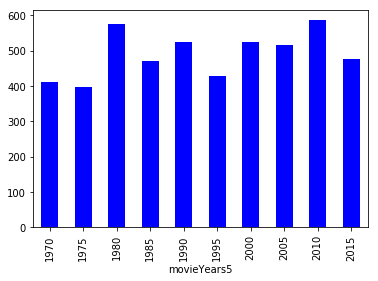

In [15]:
import matplotlib.pyplot as plt
my_groupby_array.plot.bar(color="blue")
plt.show()

In the bollyWoodDF the movieDictor, movieCast and movieGenre columns all permit multiple entries.  When multiple entries appear the individual entries are separated by pipes '|'. In order to analyze these columns we need to convert the dataframe into a Python dictionary. Once that's done we can analyze the fields in the dictionary in a variety of ways.

In [21]:
for i in range(0,10):
    castStr = bollyWoodDF.loc[i,'movieCast']
    castList = castStr.split('|')
    print(len(castList), castList)

2 ['Joy Mukherjee', 'Madan Puri']
3 ['Asha Parekh', 'Rajesh Khanna', 'Vinod Khanna']
2 ['Bindu', 'Padmini']
3 ['Shashi Kapoor', 'Hema Malini', 'Deb Mukherjee']
2 ['Sanjeev Kumar', 'Tanuja']
1 ['Helen']
4 ['Sunil Dutt', 'Asha Parekh', 'Mumtaz', 'Pran']
2 ['Shashi Kapoor', 'Jennifer Kendal']
2 ['Shatrughan Sinha', 'Anil Dhawan']
1 ['Madan Puri']
